# Binance API Scraping: ETH Historical data
- Using the api for exporting crypto prices for a specific time window

In [1]:
import requests
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Get data from binance, clean and concat the df.

In [2]:
# with this code I get the historical from first day of listing on binabce till 2020-05-12

url = 'https://api.binance.com/api/v3/klines'

symbol = 'ETHUSDT'

interval = '1d'
startTime = str(int(dt.datetime(2016, 1, 11).timestamp()*1000)) # we do now for a month
endTime = str(int(dt.datetime(2021, 1, 11).timestamp()*1000)) #wants the millisecend from the starting date
limit = 1000 #because is the max #one month * 24h 
    
req_params = {'symbol' : symbol, 'interval' : interval,'startTime' : startTime, 'endTime': endTime, 'limit' : limit}

df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
    
df = df.iloc[:, 0:6]
df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
df.head

<bound method NDFrame.head of                           datetime          open          high           low  \
2017-08-17 02:00:00  1502928000000  301.13000000  312.18000000  298.00000000   
2017-08-18 02:00:00  1503014400000  302.00000000  311.79000000  283.94000000   
2017-08-19 02:00:00  1503100800000  293.31000000  299.90000000  278.00000000   
2017-08-20 02:00:00  1503187200000  289.41000000  300.53000000  282.85000000   
2017-08-21 02:00:00  1503273600000  299.10000000  346.52000000  294.60000000   
...                            ...           ...           ...           ...   
2020-05-08 02:00:00  1588896000000  212.01000000  216.61000000  206.90000000   
2020-05-09 02:00:00  1588982400000  211.32000000  214.60000000  208.40000000   
2020-05-10 02:00:00  1589068800000  210.09000000  210.18000000  179.59000000   
2020-05-11 02:00:00  1589155200000  187.62000000  193.50000000  176.00000000   
2020-05-12 02:00:00  1589241600000  185.80000000  192.24000000  185.48000000   

         

In [3]:
df.shape

(1000, 6)

In [4]:
# with this code I get the historical from first day of listing on binabce from 2020-05-12

url = 'https://api.binance.com/api/v3/klines'

symbol = 'ETHUSDT'

interval_2 = '1d'
startTime_2 = str(int(dt.datetime(2020, 5, 12).timestamp()*1000)) # we do now for a month
endTime_2 = str(int(dt.datetime(2021, 5, 12).timestamp()*1000)) #wants the millisecend from the starting date
limit = 1000 #because is the max #one month * 24h 
    
req_params_2 = {'symbol' : symbol, 'interval' : interval_2,'startTime' : startTime_2, 'endTime': endTime_2, 'limit' : limit}

df_2 = pd.DataFrame(json.loads(requests.get(url, params = req_params_2).text))

    
#if(len(df.index)==0):
    #return None
    
df_2 = df_2.iloc[:, 0:6]
df_2.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df_2.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df_2.datetime]
df_2.head


<bound method NDFrame.head of                           datetime           open           high  \
2020-05-12 02:00:00  1589241600000   185.80000000   192.24000000   
2020-05-13 02:00:00  1589328000000   189.77000000   201.00000000   
2020-05-14 02:00:00  1589414400000   199.61000000   206.02000000   
2020-05-15 02:00:00  1589500800000   203.29000000   204.08000000   
2020-05-16 02:00:00  1589587200000   194.87000000   203.50000000   
...                            ...            ...            ...   
2021-05-07 02:00:00  1620345600000  3489.74000000  3587.00000000   
2021-05-08 02:00:00  1620432000000  3479.79000000  3958.33000000   
2021-05-09 02:00:00  1620518400000  3910.26000000  3983.65000000   
2021-05-10 02:00:00  1620604800000  3923.95000000  4208.00000000   
2021-05-11 02:00:00  1620691200000  3946.63000000  4180.22000000   

                               low          close            volume  
2020-05-12 02:00:00   185.48000000   189.76000000   669755.79567000  
2020-05-13 02

In [5]:
# concat the dataframes

df = pd.concat([df, df_2])
df.shape

(1365, 6)

In [6]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

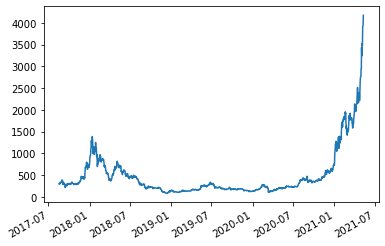

In [7]:
df['close'].astype('float').plot()

In [8]:
df.to_csv('binance_hist_data.csv')

In [9]:
# Removing the datetime col because it is redundant
df = df.iloc[:, 1:]
df

In [11]:
# turn date into an index
df['date'] = df.index
df

,open,high,low,close,volume,date
2017-08-17 02:00:00,301.13000000,312.18000000,298.00000000,302.00000000,7030.71034000,2017-08-17 02:00:00
2017-08-18 02:00:00,302.00000000,311.79000000,283.94000000,293.96000000,9537.84646000,2017-08-18 02:00:00
2017-08-19 02:00:00,293.31000000,299.90000000,278.00000000,290.91000000,2146.19773000,2017-08-19 02:00:00
2017-08-20 02:00:00,289.41000000,300.53000000,282.85000000,299.10000000,2510.13871000,2017-08-20 02:00:00
2017-08-21 02:00:00,299.10000000,346.52000000,294.60000000,323.29000000,5219.44542000,2017-08-21 02:00:00
...,...,...,...,...,...,...
2021-05-07 02:00:00,3489.74000000,3587.00000000,3353.23000000,3479.53000000,760544.64781000,2021-05-07 02:00:00
2021-05-08 02:00:00,3479.79000000,3958.33000000,3449.27000000,3910.26000000,1130467.54852000,2021-05-08 02:00:00
2021-05-09 02:00:00,3910.26000000,3983.65000000,3726.08000000,3923.95000000,1000401.00820000,2021-05-09 02:00:00
2021-05-10 02:00:00,3923.95000000,4208.00000000,3650.00000000,3945.88000000,1505897.92612000,2021-05-10 02:00:00


In [12]:
#exportthe results
df.to_csv('df_no_index.csv', index = False )

In [14]:
# Change the date column to a pandas date time column 

# Define string format
date_change = '%Y-%m-%d'


# Perform the date type change
df['date'] = pd.to_datetime(df['date'], format = date_change)

# Create a variable that is the date column
Dates = df['date']

#df print
df

,open,high,low,close,volume,date
2017-08-17 02:00:00,301.13000000,312.18000000,298.00000000,302.00000000,7030.71034000,2017-08-17 02:00:00
2017-08-18 02:00:00,302.00000000,311.79000000,283.94000000,293.96000000,9537.84646000,2017-08-18 02:00:00
2017-08-19 02:00:00,293.31000000,299.90000000,278.00000000,290.91000000,2146.19773000,2017-08-19 02:00:00
2017-08-20 02:00:00,289.41000000,300.53000000,282.85000000,299.10000000,2510.13871000,2017-08-20 02:00:00
2017-08-21 02:00:00,299.10000000,346.52000000,294.60000000,323.29000000,5219.44542000,2017-08-21 02:00:00
...,...,...,...,...,...,...
2021-05-07 02:00:00,3489.74000000,3587.00000000,3353.23000000,3479.53000000,760544.64781000,2021-05-07 02:00:00
2021-05-08 02:00:00,3479.79000000,3958.33000000,3449.27000000,3910.26000000,1130467.54852000,2021-05-08 02:00:00
2021-05-09 02:00:00,3910.26000000,3983.65000000,3726.08000000,3923.95000000,1000401.00820000,2021-05-09 02:00:00
2021-05-10 02:00:00,3923.95000000,4208.00000000,3650.00000000,3945.88000000,1505897.92612000,2021-05-10 02:00:00


In [ ]:
# Change the date column to a pandas date time column 

# Define string format
date_change = '%Y-%m-%d'

# Create a new date column from the index
df['date'] = df.index

# Perform the date type change
df['Date'] = pd.to_datetime(df['Date'], format = date_change)

# Create a variable that is the date column
Dates = df['Date']